# Models Example

In [1]:
import numpy as np
import xarray as xr

from xfit import fit_dataArray_models, fit_dataset_models, plot_fits, plot_model_fits
from xfit import fitParameter, fitModel

Here we will show how to use the models functionality

## Generating dummy data

In [2]:
def symlor(x, S):
    return S/((x-5)**2 + 1)

def asymlor(x, A):
    return A*(x-5)/((x-5)**2 + 1)

In [3]:
xs = xr.DataArray(np.linspace(0,10,101), coords={'x': np.linspace(0,10,101)}, dims='x')
Ss = xr.DataArray(np.linspace(-2,2,3), coords = {'S_true': np.linspace(-2,2,3)}, dims='S_true')
As = xr.DataArray(np.linspace(-2,2,3), coords = {'A_true': np.linspace(-2,2,3)}, dims='A_true')
cs = xr.DataArray(np.linspace(-1,1,3), coords = {'c_true': np.linspace(-1,1,3)}, dims='c_true')

data = symlor(xs, Ss) + asymlor(xs, As) + cs + np.random.rand(3,101,3,3)*0.2

The data we have made are the sum of a symmetric and antisymmetric lorentzian with a constant background offset.

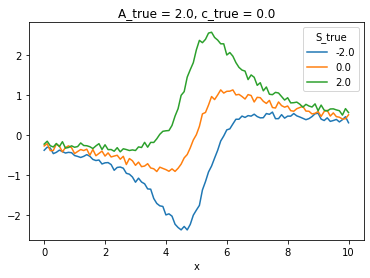

In [4]:
_ = data.sel(c_true=0, A_true=2).plot.line(x='x')

In [31]:
data.coords['S_true'].values == np.array([-2., 0., 2.])

array([ True,  True,  True])

In [28]:
list(data.coords) == list(data.coords)

True

## Making the models

In [5]:
def lor_guess(x, y, **kwargs):
    return (y.max()-y.min())/2

sym_lor_params = [fitParameter('S')]

sym_lor_model = fitModel('sym', symlor, sym_lor_params, lor_guess)

asym_lor_params = [fitParameter('A')]

asym_lor_model = fitModel('asym', asymlor, asym_lor_params, lor_guess)

def const(x, c):
    return c

def const_guess(x, y, **kwargs):
    return 1

const_params = [fitParameter('c')]

const_model = fitModel('const', const, const_params, const_guess)

## Fitting

In [6]:
fit = fit_dataArray_models(data, [sym_lor_model, asym_lor_model, const_model], 'x')

The result is a dataset much like the one for regular fitting, but with the models saved as well.

In [7]:
fit

<xarray.Dataset>
Dimensions:    (A_true: 3, S_true: 3, c_true: 3, param: 3, param_cov: 3, x: 101)
Coordinates:
  * c_true     (c_true) float64 -1.0 0.0 1.0
  * A_true     (A_true) float64 -2.0 0.0 2.0
  * S_true     (S_true) float64 -2.0 0.0 2.0
  * param      (param) <U1 'S' 'A' 'c'
  * param_cov  (param_cov) <U1 'S' 'A' 'c'
  * x          (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 9.5 9.6 9.7 9.8 9.9 10.0
Data variables:
    popt       (param, S_true, A_true, c_true) float64 -1.997 -1.999 ... 1.105
    perr       (param, S_true, A_true, c_true) float64 0.01857 ... 0.008039
    pcov       (param_cov, param, S_true, A_true, c_true) float64 0.000345 ... 6.463e-05
    xda        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 9.5 9.6 9.7 9.8 9.9 10.0
    yda        (S_true, x, A_true, c_true) float64 -0.5359 0.4459 ... 1.624
    yerr_da    (S_true, x, A_true, c_true) float64 nan nan nan ... nan nan nan
Attributes:
    fit_func:     <function fit_dataArray_models.<locals>.full_func at 0x7f0b...
    param_names:  ['S', 'A', 'c']
    xname:        x
    yname:        None
    models:       {'sym': <fitModel sym>\nParameters:\n  <fitParameter S, (-i...

We can plot the fit functions over the original data to do a quick diagnostic:

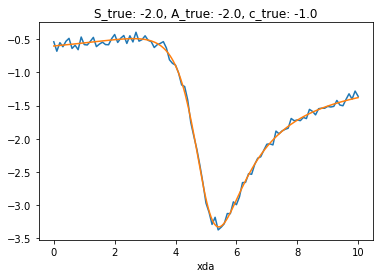

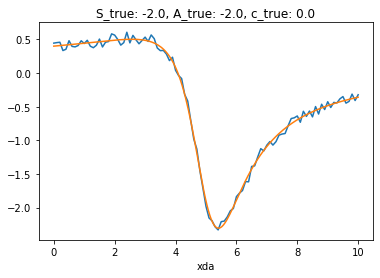

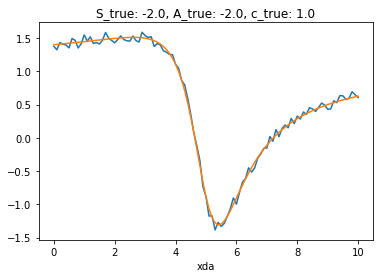

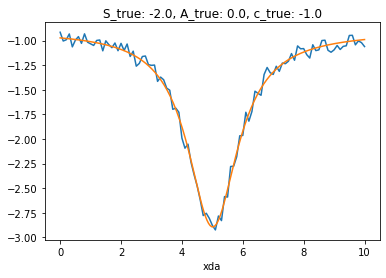

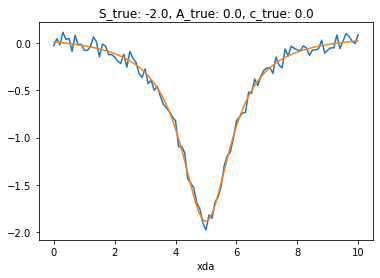

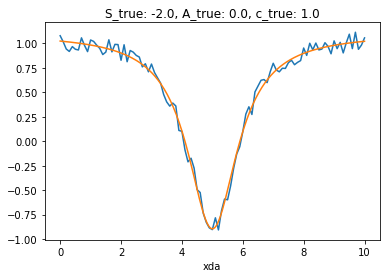

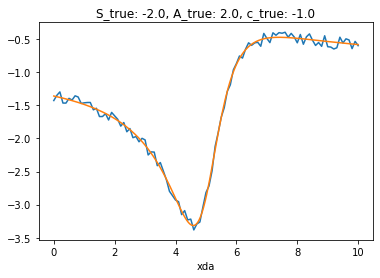

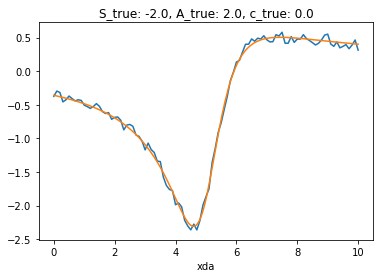

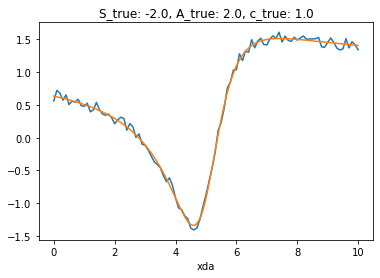

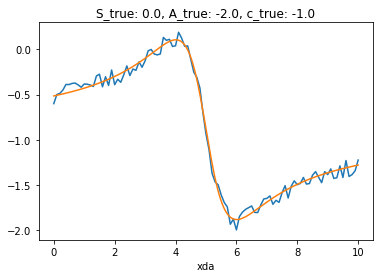

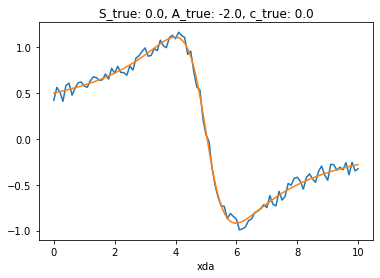

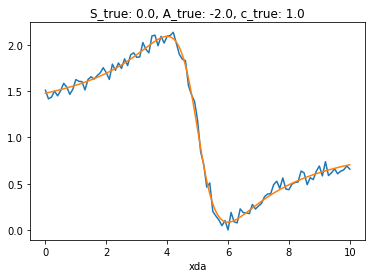

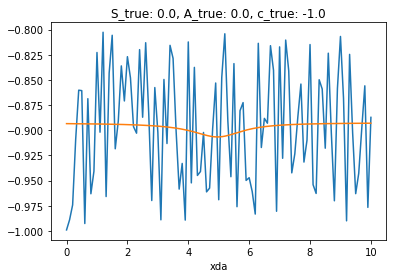

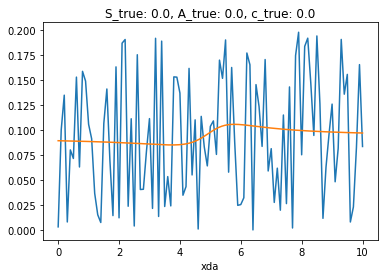

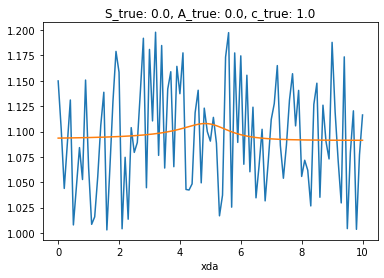

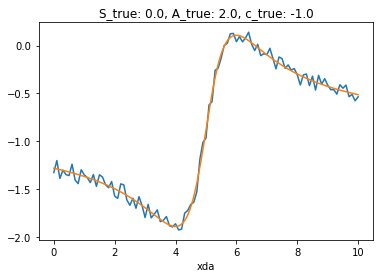

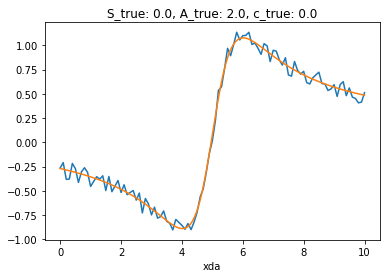

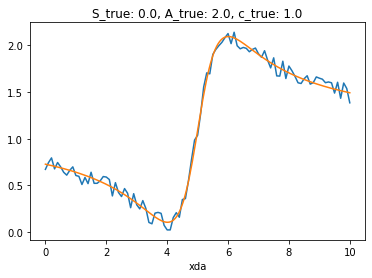

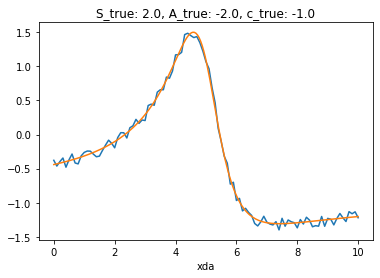

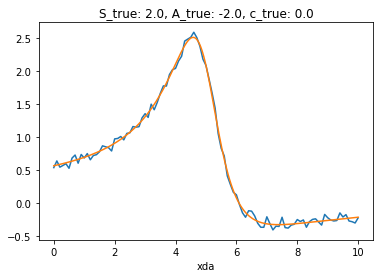

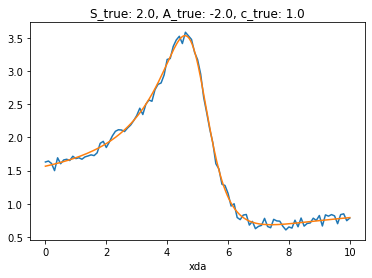

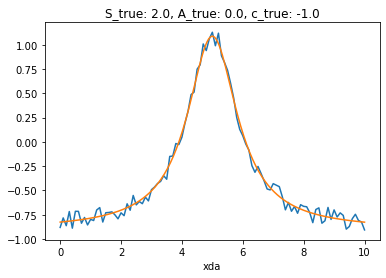

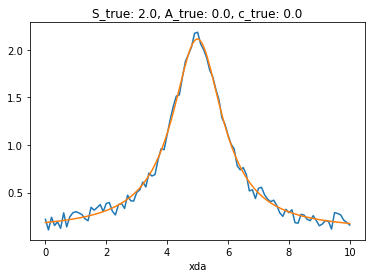

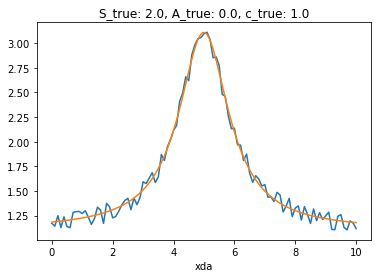

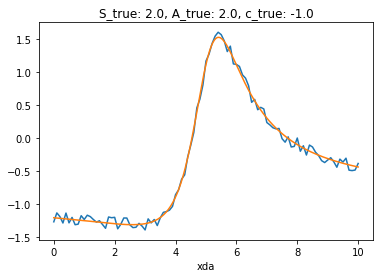

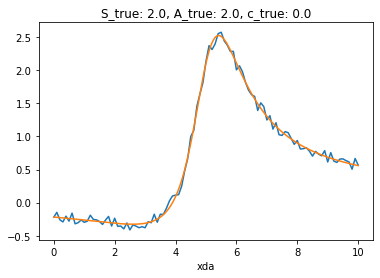

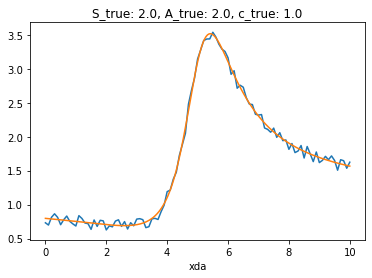

In [8]:
plot_fits(fit)

We can also have it plot the individual modesl for additional diagnostics

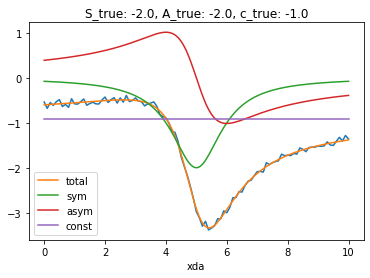

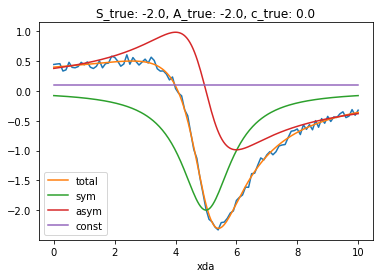

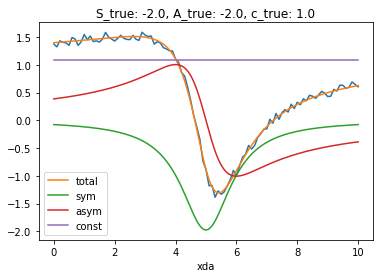

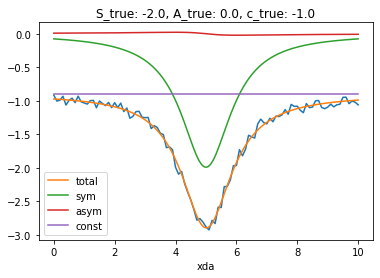

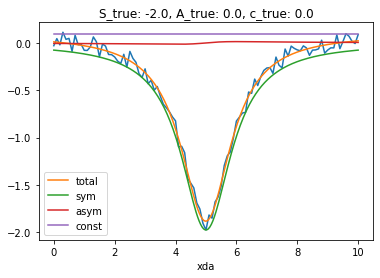

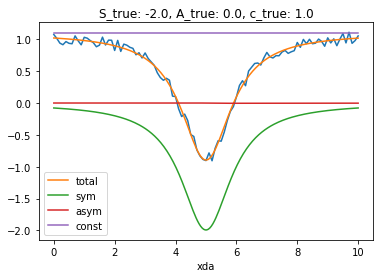

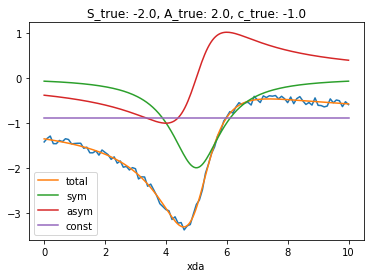

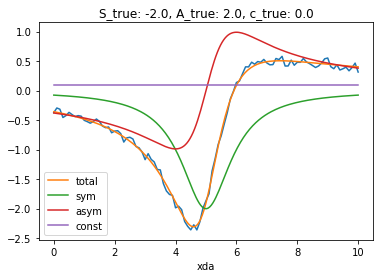

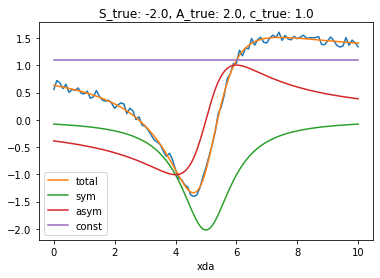

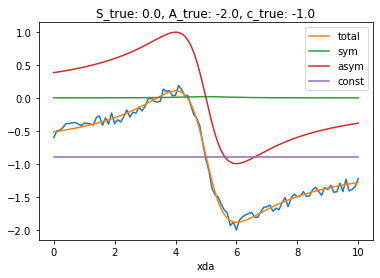

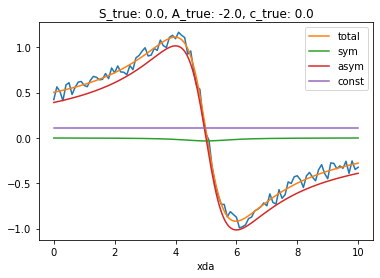

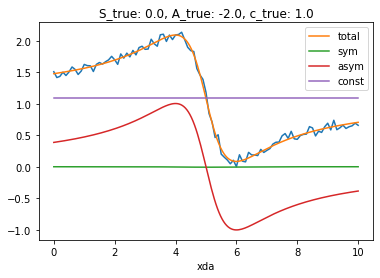

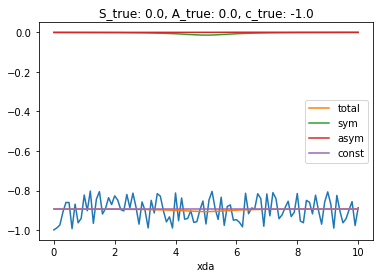

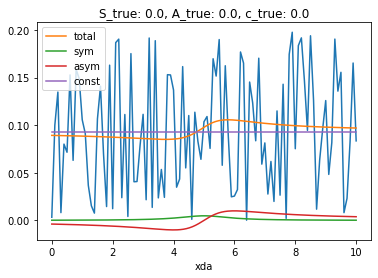

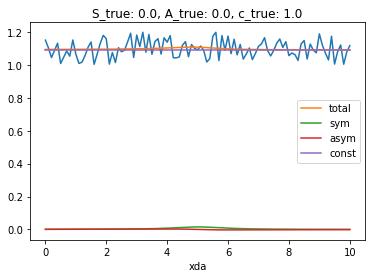

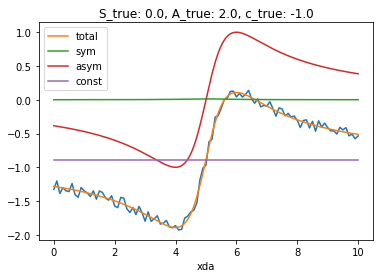

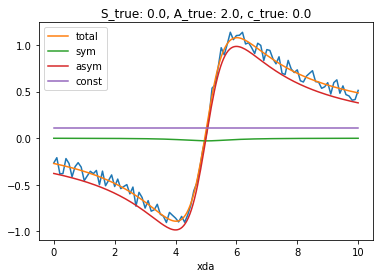

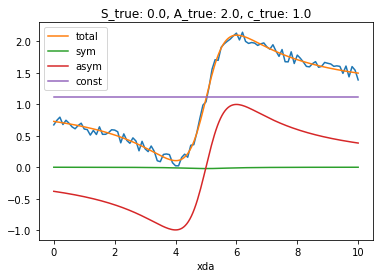

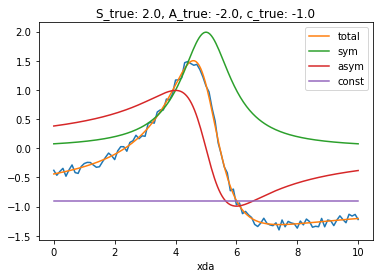

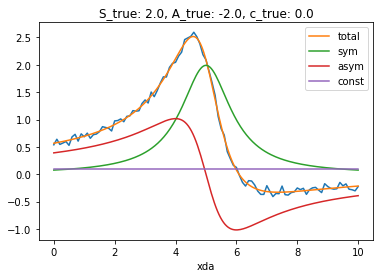

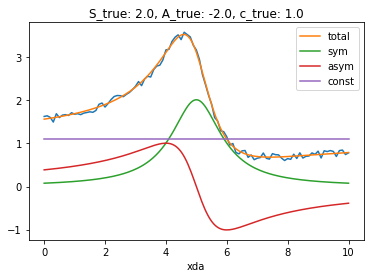

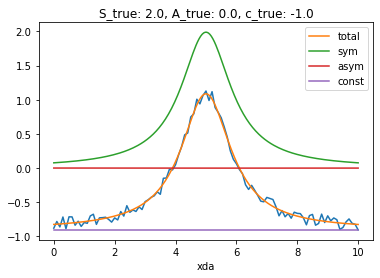

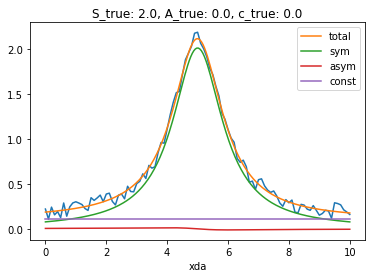

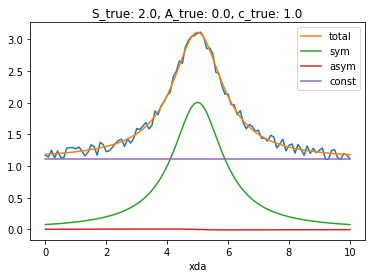

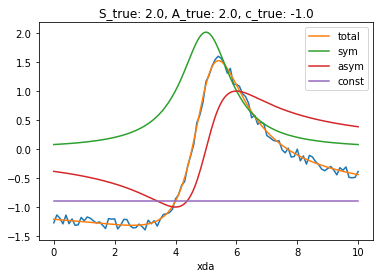

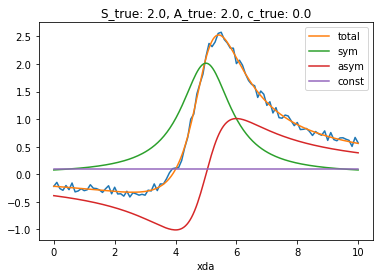

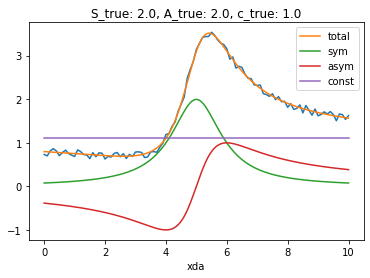

In [9]:
plot_model_fits(fit)

Since the offset is just a constant background, we can set that model as a background model which will just be added to the fit curves of all of the other models and not be shown:

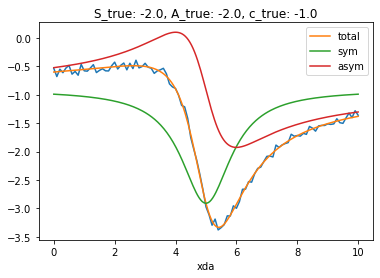

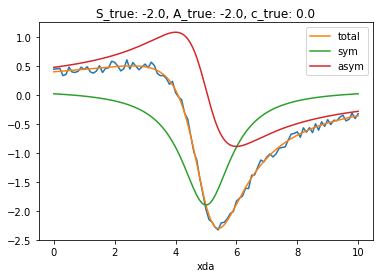

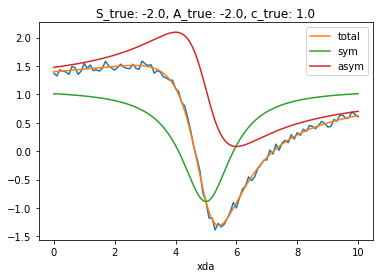

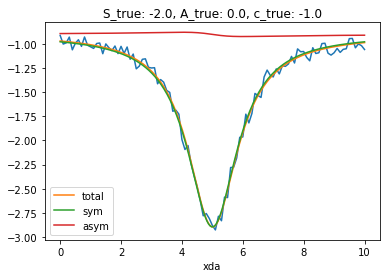

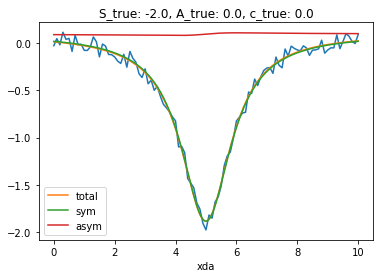

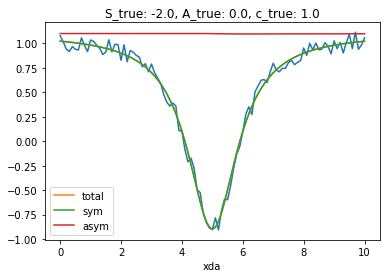

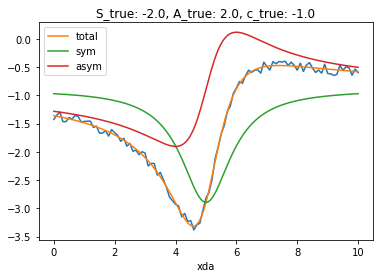

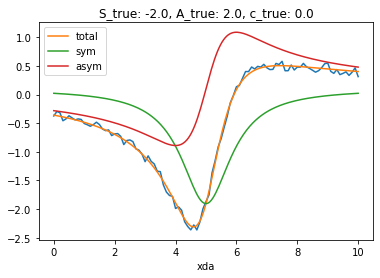

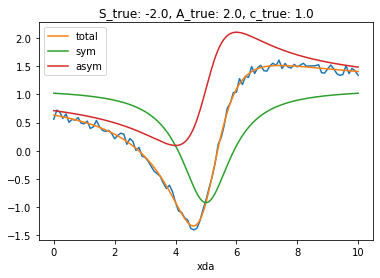

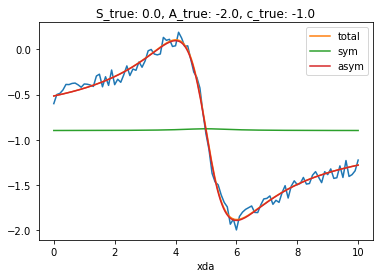

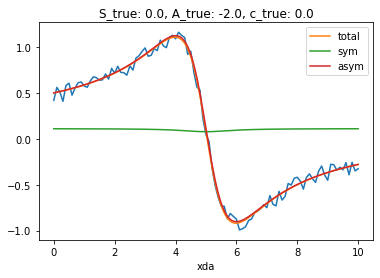

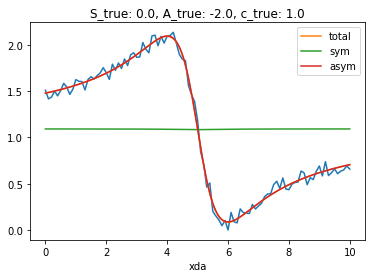

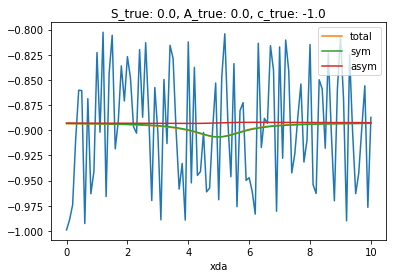

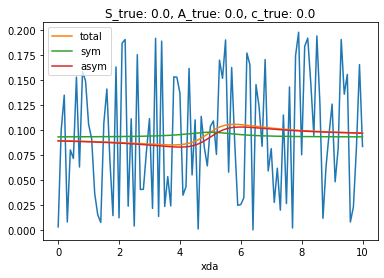

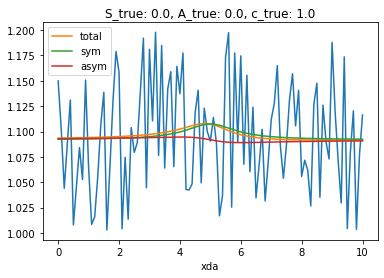

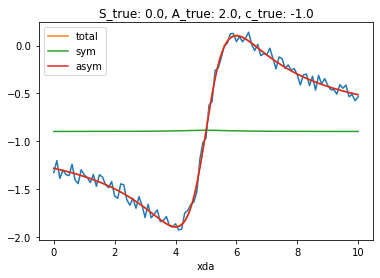

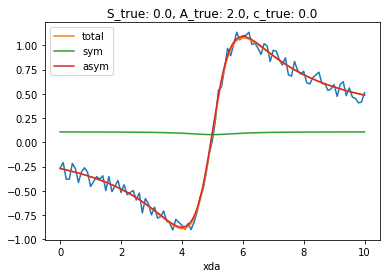

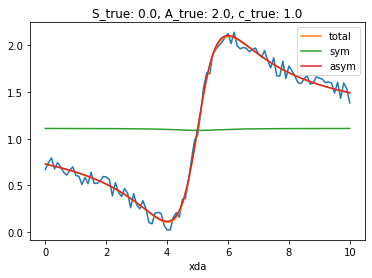

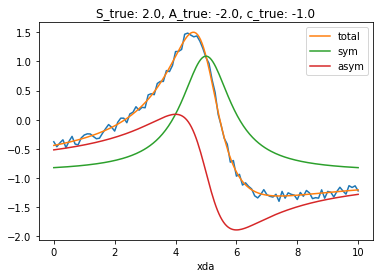

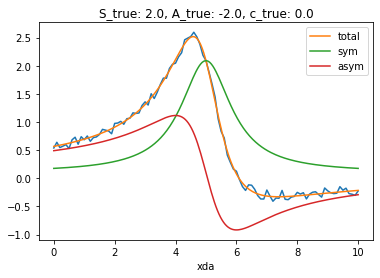

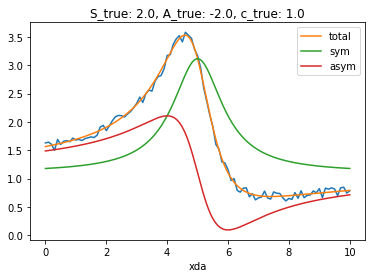

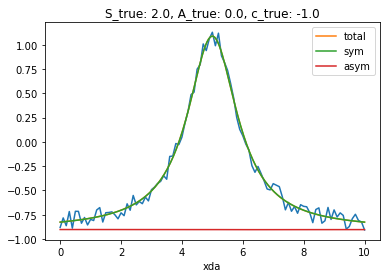

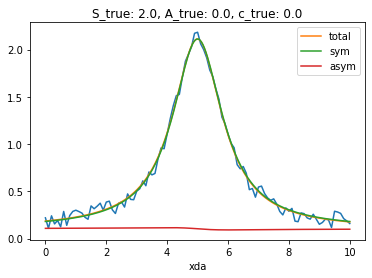

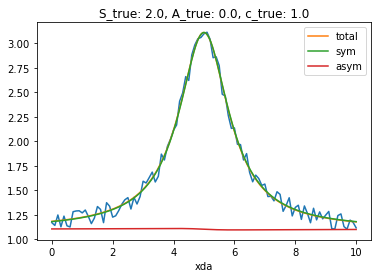

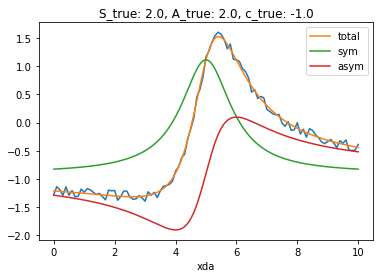

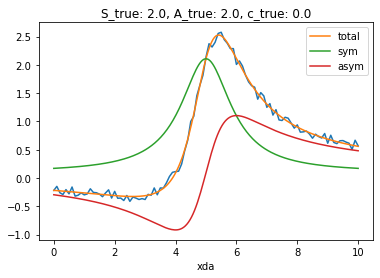

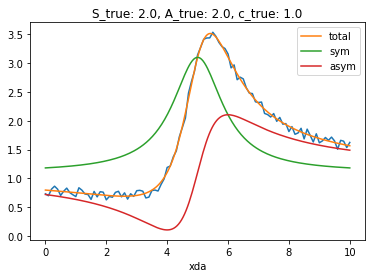

In [10]:
plot_model_fits(fit, background_models=['const'])

## Fitting Datasets

In [11]:
data_ds = xr.Dataset(data_vars={'mydata': data})

Fitting is basically the same, except we now also need to specify the data variable containing the data we would like to fit over

In [12]:
fit2 = fit_dataset_models(
    data_ds,
    [sym_lor_model, asym_lor_model, const_model],
    'x',
    'mydata'
)

`fit2` is the same as `fit`

In [13]:
(fit == fit2).all()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    popt     bool True
    perr     bool True
    pcov     bool True
    xda      bool True
    yda      bool True
    yerr_da  bool False

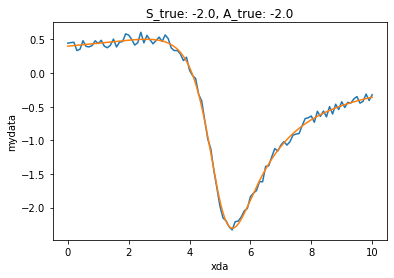

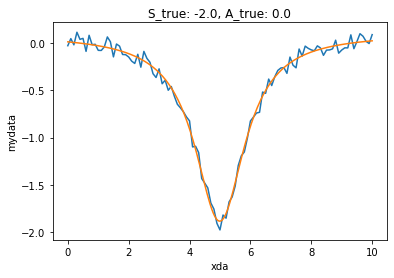

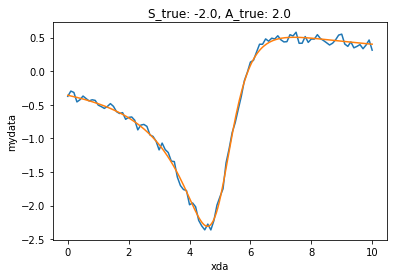

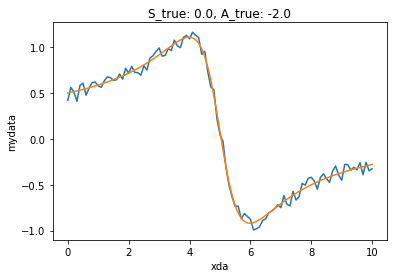

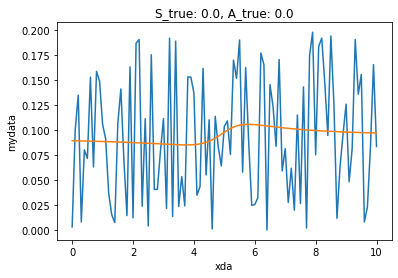

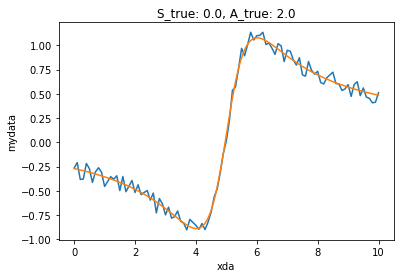

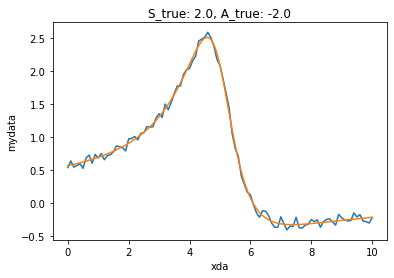

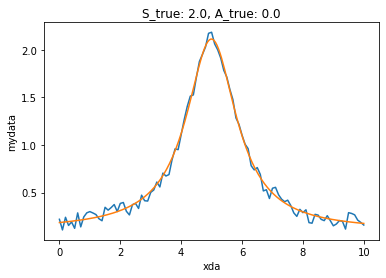

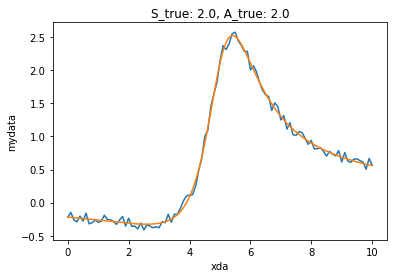

In [15]:
plot_fits(fit2, c_true=0)